<a href="https://colab.research.google.com/github/raiannysoares/analise_de_agradecimentos/blob/main/analise_agradecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
#Carregando dados
dados = pd.read_csv('/content/PresentlyBackup2023-02-27T15-19-50.csv')
dados.columns = ['data', 'agradecimentos']
dados.head()

,data,agradecimentos
0,2023-02-26,• Por ter assistido série \n• Por minha famíli...
1,2023-02-25,• Por ter estudado \n• Por tá bem\n• Por ter c...
2,2023-02-24,• Por ter voltado pro jiu-jitsu \n• Por ter pe...
3,2023-02-23,• Por ter comido churros\n• Por ter estudado\n...
4,2023-02-22,• Por tá desenvolvendo meu projeto\n• Por ter ...


In [30]:
# Juntar todas as palavras

# Variavel que irá juntar todas as palavras
agradecimentos = ''

# Loop na coluna Palavras
for Palavra in dados['agradecimentos']:
  # Concatenando todas as palavras com um "espaço"
  agradecimentos = agradecimentos + ' ' + Palavra

# Verificando nossa variavel
agradecimentos

" • Por ter assistido série \n• Por minha família tá bem\n• Por ter conversado mais com Nathan  • Por ter estudado \n• Por tá bem\n• Por ter comido peixinho  • Por ter voltado pro jiu-jitsu \n• Por ter pessoas que gostam de mim \n• Por ter Nathan pra compartilhar a vida comigo • Por ter comido churros\n• Por ter estudado\n• Por tá bem • Por tá desenvolvendo meu projeto\n• Por ter dormido bem\n• Por ainda ter esperanças  • Pelo feriadão \n• Por tá bem \n• Por ter estudado • Por ter melhorado da barriga \n• Por minha família tá bem \n• Por ainda ter esperanças  • Por ter descansado \n• Por tá bem \n• Por ter comido bem  • Por ter ido comer churrasco \n• Por tá bem\n• Por ter dormido bem • Por ter estudado \n• Por tá bem\n• Por ter falado com Nathan  • Por ter dado certo o grupo de estudos \n• Por tá bem\n• Por tá motivada  • Por ter começado a estudar inglês novamente \n• Por voltar a treinar\n• Por tá bem  • Por tá bem\n• Por ter descansado \n• Por ter a chance de recusar trabalhos ince

In [73]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["•","Por","\n","ter","pelo","pela","Pela","Pelo","de","Nathan","tá","coisas",
                  "em","coisa","feito","da","o","ficado","meu","minha","emprego","pra"])

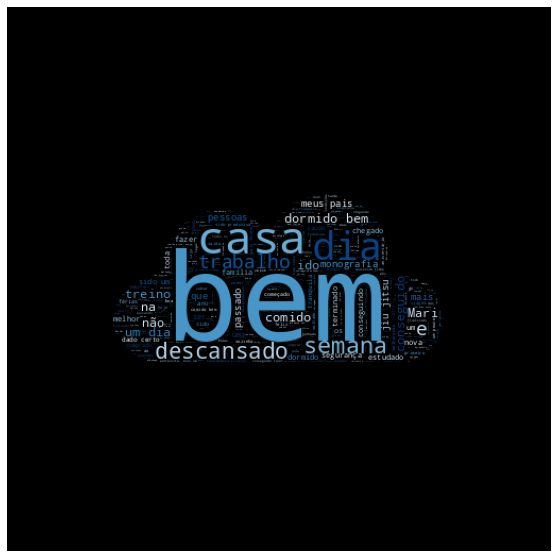

In [72]:
# endereço da imagem
img_mask = np.array(Image.open("/content/nuvem.png"))
   
# configurar wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,colormap="Blues",
                      mask=img_mask, max_font_size=200,
                      min_font_size=1).generate(agradecimentos)

# mostrar a imagem
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

# salvar no diretorio
wordcloud.to_file("wordcloud_mickey.png")